In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.copy_on_write = True

In [17]:
pd.set_option('display.max.rows', 46442)

In [18]:
Intl_results = pd.read_csv("/Users/Gabriel/Documents/GitHub/Philippine_Football_Data_Project/results.csv")
Ph_results = Intl_results[(Intl_results["home_team"]== "Philippines") | (Intl_results["away_team"]== "Philippines")]
Goal_scorers = pd.read_csv("/Users/Gabriel/Documents/GitHub/Philippine_Football_Data_Project/goalscorers.csv")
Shootouts = pd.read_csv("/Users/Gabriel/Documents/GitHub/Philippine_Football_Data_Project/shootouts.csv")

In [19]:
Ph_results["result"] = Ph_results.apply(lambda row: "Win" if (row["home_team"] == "Philippines" and row["home_score"] > row["away_score"]) or (row["away_team"] == "Philippines" and row["home_score"] < row["away_score"]) else ("Draw" if row["home_score"] == row["away_score"] else "Lose"), axis = 1)

In [20]:
result_count = {"Win":0, "Lose": 0, "Draw": 0}

win_count = []
lose_count = []
draw_count = []

for index, row in Ph_results.iterrows():
    result_count[row["result"]] += 1
    win_count.append(result_count["Win"])
    lose_count.append(result_count["Lose"])
    draw_count.append(result_count["Draw"])

Ph_results["win_count"] = win_count
Ph_results["lose_count"] = lose_count
Ph_results["draw_count"] = draw_count
Ph_results["year"] = Ph_results.apply(lambda row: row["date"].split("-")[0], axis=1)

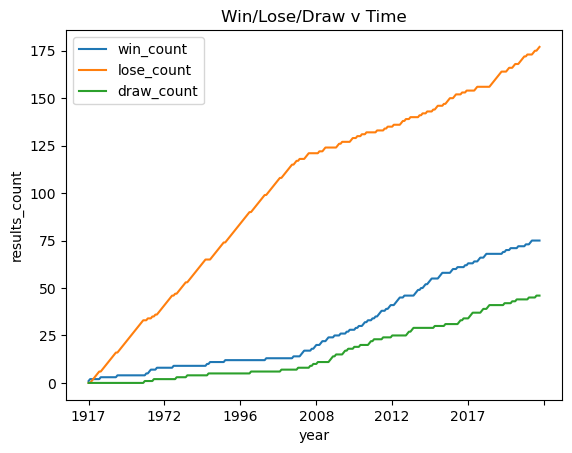

In [21]:
Ph_WLDvTime = Ph_results.plot(x="year", xlabel = "year", y=["win_count", "lose_count", "draw_count"], ylabel = "results_count", kind="line", title="Win/Lose/Draw v Time")

In [22]:
goal_scorers = Goal_scorers[(Goal_scorers["team"] == "Philippines") & (Goal_scorers["own_goal"] == False)][["scorer", "team"]].groupby(["scorer"], as_index=False).count().rename(columns = {"team" : "goal_count"}).sort_values(by="goal_count", ascending = True)

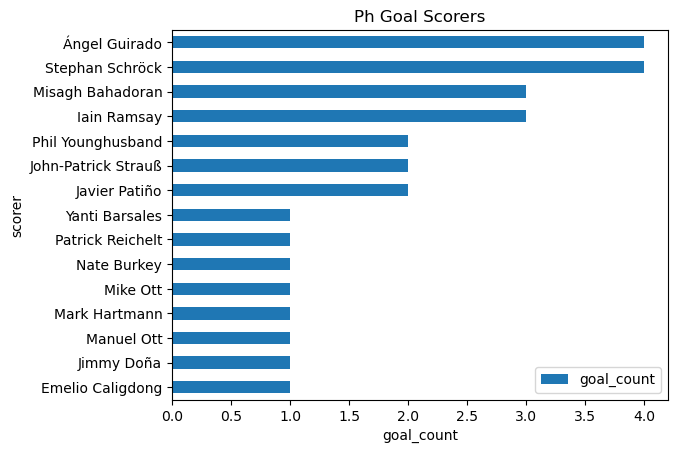

In [23]:
Ph_goal_scorers = goal_scorers.plot(x = "scorer", y = "goal_count", xlabel = "goal_count", kind = "barh", title = "Ph Goal Scorers")

In [24]:
Ph_results_goals = Goal_scorers[(Goal_scorers["home_team"] == "Philippines") | (Goal_scorers["away_team"] == "Philippines")]
Ph_scored_count = Ph_results_goals[((Ph_results_goals["team"] == "Philippines") & (Ph_results_goals["own_goal"] == False)) | ((Ph_results_goals["team"] != "Philippines") & (Ph_results_goals["own_goal"] == True))][["minute", "scorer"]].groupby("minute", as_index = False).count().rename(columns = {'scorer': 'goals_scored'})
Ph_conceded_count = Ph_results_goals[((Ph_results_goals["team"] != "Philippines") & (Ph_results_goals["own_goal"] == False)) | ((Ph_results_goals["team"] == "Philippines") & (Ph_results_goals["own_goal"] == True))][["minute", "scorer"]].groupby("minute", as_index = False).count().rename(columns = {'scorer': 'goals_conceded'})

In [25]:
minute_scored_conceded = {"intervals": ["15min", "30min", "45min", "60min", "75min", "90min", "105min", "120min", "120+min"],
"scored": [0] * 9,
"conceded": [0] * 9}

for index, row in Ph_scored_count.iterrows():
    i = int(int(row["minute"]) / 15)
    minute_scored_conceded["scored"][i] += 1

for index, row in Ph_conceded_count.iterrows():
    i = int(int(row["minute"]) / 15)
    minute_scored_conceded["conceded"][i] += 1

minute_scored_conceded = pd.DataFrame(minute_scored_conceded)

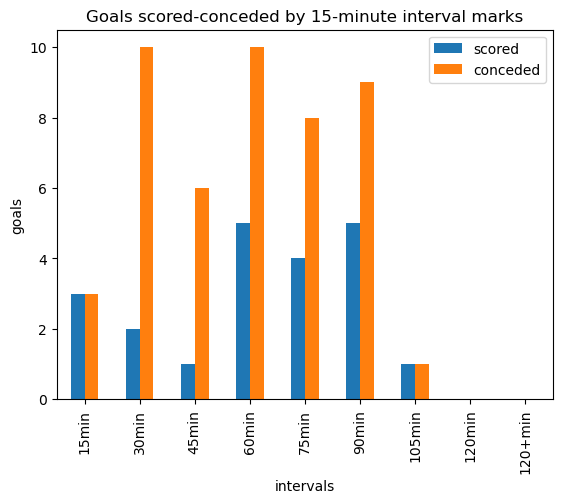

In [26]:
Ph_minute_scored_conceded = minute_scored_conceded.plot(kind = "bar", x = "intervals", y = ["scored", "conceded"], ylabel = "goals", title = "Goals scored-conceded by 15-minute interval marks")